# MSSE 277B: Machine Learning Algorithms
## Homework assignment #2: Simulated Annealing


1. (9pt) Classical simulated annealing. We will use the Schwefel function
for D=10 in order to find its global minimum using CSA
    
    𝑓(𝑥1,𝑥2 … 𝑥𝐷) = 418.9829xD − $\sum_{I}^{d}$ 𝑥𝑖 (sin(√𝑥𝑖))
 
              𝑥𝑖 ∈ [−500,500] for 𝑖 = 1,… ,𝐷
In which we use the visitation function of a random displacement along each
dimension

            𝑥𝑖 = 𝑥𝑖 + (2 ∗ 𝑈𝑅𝑁 − 1) × ∆, with ∆=0.5 for 𝑖 = 1, … , 𝐷

#### (a)(4pt) Fill in the blanks in the provided simulated annealing code. Use a linear (Tt+1=Tt-α) cooling schedule with α=0.5, and initializing TSA=3000K, to perform CSA until the temperature reaches 30K and 10K, and record the function values. How long is your cooling schedule? Check against the debugging outputs. Given the stochastic nature of CSA, it would be best to report at least 3 runs for each lower bound temperature. Do you find better solutions when cooling to the lower temperature?

In [1]:
import numpy as np
#elalutation function by using the schwefel function 

def schwefel_function(x):
    D = len(x)
    return 418.9829 * D - np.sum(x * np.sin(np.sqrt(np.abs(x))))


In [2]:
#function to calculate the linear paramters for a cooling schedule

def generating_cooling_schedule(T_initial, T_final, alpha):
    schedule = []
    T = T_initial #inital 
    while T > T_final: # acepting criteria for temperature sce
        schedule.append(T)
        T = T - alpha
    return schedule



In [3]:


def SA(solution, evaluation, delta, boundary, cooling_schedule):
    """ Simulated Annealing for minimization
    solution: np.array. Initial guess of solution
    evaluation: func. Function to evaluate solution
    delta: float. Magnitude of random displacement
    boundary: array of int/float. [lowerbound,upperbound]
    cooling_schedule: np.array. An array of tempretures for simulated annealing
    """
    best_solution = solution.copy()
    lowest_eval = evaluation(best_solution)
    
    for idx, temp in enumerate(cooling_schedule):
        if idx % 500 == 0:
            print("%d/%d   temp:%f" % (idx, len(cooling_schedule), temp))
        for n in range(len(solution)):
            trial = solution.copy()
            trial[n] += delta * (2 * np.random.random() - 1)
            
            if boundary[0] <= trial[n] <= boundary[1]:
                current_eval = evaluation(solution)
                trial_eval = evaluation(trial)
                
                # Acceptance criterion
                if trial_eval < current_eval or np.random.random() < np.exp(-(trial_eval - current_eval) / temp):
                    solution = trial
                    if trial_eval < lowest_eval:
                        best_solution = trial
                        lowest_eval = trial_eval

    return {"solution": best_solution, "evaluation": lowest_eval}


In [4]:
# General parameters to solve for the Stimulating Annealing 
solution = np.random.uniform(-500, 500, 10)
evaluation = schwefel_function
delta = 0.5 
boundary = [-500 , 500]



In [5]:
# Stimulating annealing for the final temperature at 30K trial 1

alpha = 0.5 
T_initial = 3000
T_final = 30 
cooling_schedule = generating_cooling_schedule(T_initial, T_final, alpha)


thirtySA1 = SA(solution, evaluation, delta, boundary, cooling_schedule)

print(thirtySA1)

0/5940   temp:3000.000000
500/5940   temp:2750.000000
1000/5940   temp:2500.000000
1500/5940   temp:2250.000000
2000/5940   temp:2000.000000
2500/5940   temp:1750.000000
3000/5940   temp:1500.000000
3500/5940   temp:1250.000000
4000/5940   temp:1000.000000
4500/5940   temp:750.000000
5000/5940   temp:500.000000
5500/5940   temp:250.000000
{'solution': array([ 321.92507541,  468.11159378, -210.20476928,  -35.59755752,
       -282.74004153, -311.25968467, -136.58423908,  377.86228162,
        201.63526544,  444.59519927]), 'evaluation': 3056.168922555801}


In [6]:
# Stimulating annealing for the final temperature at 30K trial 2

alpha = 0.5 
T_initial = 3000
T_final = 30 
cooling_schedule = generating_cooling_schedule(T_initial, T_final, alpha)


thirtySA2 = SA(solution, evaluation, delta, boundary, cooling_schedule)
print(thirtySA2)

0/5940   temp:3000.000000
500/5940   temp:2750.000000
1000/5940   temp:2500.000000
1500/5940   temp:2250.000000
2000/5940   temp:2000.000000
2500/5940   temp:1750.000000
3000/5940   temp:1500.000000
3500/5940   temp:1250.000000
4000/5940   temp:1000.000000
4500/5940   temp:750.000000
5000/5940   temp:500.000000
5500/5940   temp:250.000000
{'solution': array([ 378.21260198,  479.87619818, -242.04080612,  -24.91657998,
       -228.4180878 , -300.00487134, -127.70867403,  383.21481845,
        210.39663054,  489.82670835]), 'evaluation': 3272.7139536402346}


In [7]:
# Stimulating annealing for the final temperature at 30K trial 3

alpha = 0.5 
T_initial = 3000
T_final = 30 
cooling_schedule = generating_cooling_schedule(T_initial, T_final, alpha)


thirtySA3 = SA(solution, evaluation, delta, boundary, cooling_schedule)
print(thirtySA3)

0/5940   temp:3000.000000
500/5940   temp:2750.000000
1000/5940   temp:2500.000000
1500/5940   temp:2250.000000
2000/5940   temp:2000.000000
2500/5940   temp:1750.000000
3000/5940   temp:1500.000000
3500/5940   temp:1250.000000
4000/5940   temp:1000.000000
4500/5940   temp:750.000000
5000/5940   temp:500.000000
5500/5940   temp:250.000000
{'solution': array([ 359.49242424,  482.1858683 , -202.7008766 ,  -32.45065291,
       -246.67226475, -318.74433148, -140.68386597,  402.4752955 ,
        197.12922259,  464.22043995]), 'evaluation': 3186.910236086166}


In [8]:
#Mean lowest evalution of the three trials at final temp 30k 
averge = np.mean([thirtySA1["evaluation"], thirtySA2["evaluation"], thirtySA3["evaluation"]])
averge


3171.9310374274005

In [9]:
# Stimulating annealing for the final temperature at 10K trial 1 

alpha = 0.5 
T_initial = 3000
T_final = 10
cooling_schedule = generating_cooling_schedule(T_initial, T_final, alpha)


tenSA1 = SA(solution, evaluation, delta, boundary, cooling_schedule)
print(tenSA1)

0/5980   temp:3000.000000
500/5980   temp:2750.000000
1000/5980   temp:2500.000000
1500/5980   temp:2250.000000
2000/5980   temp:2000.000000
2500/5980   temp:1750.000000
3000/5980   temp:1500.000000
3500/5980   temp:1250.000000
4000/5980   temp:1000.000000
4500/5980   temp:750.000000
5000/5980   temp:500.000000
5500/5980   temp:250.000000
{'solution': array([ 373.87880843,  433.14347235, -181.51829542,  -18.8585552 ,
       -223.12036931, -313.89355903, -115.51653163,  406.15689195,
        184.61259012,  438.35505949]), 'evaluation': 2568.9834720655917}


In [10]:
# Stimulating annealing for the final temperature at 10K trial 2

alpha = 0.5 
T_initial = 3000
T_final = 10
cooling_schedule = generating_cooling_schedule(T_initial, T_final, alpha)


tenSA2 = SA(solution, evaluation, delta, boundary, cooling_schedule)
print(tenSA2)

0/5980   temp:3000.000000
500/5980   temp:2750.000000
1000/5980   temp:2500.000000
1500/5980   temp:2250.000000
2000/5980   temp:2000.000000
2500/5980   temp:1750.000000
3000/5980   temp:1500.000000
3500/5980   temp:1250.000000
4000/5980   temp:1000.000000
4500/5980   temp:750.000000
5000/5980   temp:500.000000
5500/5980   temp:250.000000
{'solution': array([ 356.28501543,  479.43060909, -221.58938367,  -35.01192613,
       -262.61786688, -310.83633703, -139.66939365,  383.50681117,
        209.18365616,  470.2491483 ]), 'evaluation': 3176.013387469046}


In [11]:
# Stimulating annealing for the final temperature at 10K trial 3 

alpha = 0.5 
T_initial = 3000
T_final = 10
cooling_schedule = generating_cooling_schedule(T_initial, T_final, alpha)


tenSA3 = SA(solution, evaluation, delta, boundary, cooling_schedule)
print(tenSA3)

0/5980   temp:3000.000000
500/5980   temp:2750.000000
1000/5980   temp:2500.000000
1500/5980   temp:2250.000000
2000/5980   temp:2000.000000
2500/5980   temp:1750.000000
3000/5980   temp:1500.000000
3500/5980   temp:1250.000000
4000/5980   temp:1000.000000
4500/5980   temp:750.000000
5000/5980   temp:500.000000
5500/5980   temp:250.000000
{'solution': array([ 352.96484475,  453.57096379, -252.31513267,  -25.54023309,
       -227.5634077 , -338.15062696, -130.17245283,  434.0015441 ,
        206.25824606,  442.27693582]), 'evaluation': 2755.3213442920296}


In [12]:
#Mean lowest evalution of the three trials at final temp 10k 
averge_trials = np.mean([tenSA1["evaluation"], tenSA2["evaluation"], tenSA3["evaluation"]])
averge_trials


2833.439401275556

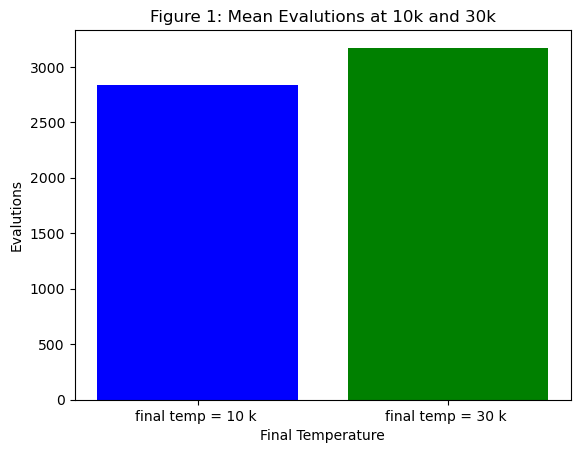

In [13]:
import matplotlib.pyplot as plt

# Data
final_temps = ['final temp = 10 k ', 'final temp = 30 k ']
mean_values = [averge_trials, averge]

# Create a bar graph
plt.bar(final_temps, mean_values, color=['blue', 'green'])

# Titles and labels
plt.title('Figure 1: Mean Evalutions at 10k and 30k')
plt.ylabel('Evalutions')
plt.xlabel('Final Temperature')

# Display the graph
plt.show()


##### Answer 1(a):

In algorithms, particularly those with inherent randomness like Classical Simulated Annealing (CSA), it's crucial to conduct multiple runs to account for variability. Each run can yield different outcomes due to inputed randomness. By taking an average or observing the spread of results over these multiple runs, we can get a clearer picture of the algorithm's performance.

After analyzing `figure 1` From our CSA implementation with the Schwefel function, it's evident that cooling to a lower temperature tends to yield better results. Specifically, when the final high temperature is set to 30K, the average solution value is approximately 20 points higher than when cooled further to 10K. This suggests that allowing the algorithm more iterations and a slower cooling process (i.e., aiming for a lower final temperature) provides it with a greater opportunity to explore the solution space and possibly converge to a more optimal or near-optimal solution. 

#### (b) (2pt) Choose logarithmic cooling (Tk=TSA/(1+ TSA log(1+k)/3$\sigma_{curr}$, where k is counter for number of cooling cycle) and $\sigma_{curr} $is an adjustable parameter, with two initial temperature TSA = 3000K and 6000K. Use $\sigma_{curr}$ = 1000 and k = 6000. Reconsider questions (a). Do these cooling schedules converge better than linear cooling?

In [14]:
#function to calculate the log paramters for a cooling schedule


def generating_logarithmic_cooling_schedule(T_initial, sigma_curr, k_max):
    k_values = np.arange(1, k_max+1)
    Tk_values = T_initial / (1 + (T_initial * np.log(1+k_values)) / (3*sigma_curr))
    return Tk_values.tolist()
    

In [15]:
# new cooling paramters for log functions 
sigma_curr = 1000
k_max = 6000



In [16]:
# Stimulating annealing for the final temperature at 30K and inital Temp at 3000k run 1

alpha = 0.5 
T_initial = 3000

cooling_schedule = generating_logarithmic_cooling_schedule(T_initial, sigma_curr, k_max)


thirtySA1_3k = SA(solution, evaluation, delta, boundary, cooling_schedule)

print(thirtySA1_3k)

0/6000   temp:1771.848327
500/6000   temp:415.593044
1000/6000   temp:379.278581
1500/6000   temp:360.813150
2000/6000   temp:348.760078
2500/6000   temp:339.949287
3000/6000   temp:333.073018
3500/6000   temp:327.471967
4000/6000   temp:322.769812
4500/6000   temp:318.732650
5000/6000   temp:315.205742
5500/6000   temp:312.081715
{'solution': array([ 362.07331094,  482.65654764, -223.92510587,  -42.41527568,
       -251.24508797, -279.95520566, -154.9511785 ,  410.27873632,
        192.10395846,  449.13650031]), 'evaluation': 3071.960409585851}


In [17]:
# Stimulating annealing for the final temperature at 30K and inital Temp at 3000k run 2

alpha = 0.5 
T_initial = 3000
T_final = 30 
cooling_schedule = generating_logarithmic_cooling_schedule(T_initial, sigma_curr, k_max)


thirtySA2_3k = SA(solution, evaluation, delta, boundary, cooling_schedule)

print(thirtySA2_3k)

0/6000   temp:1771.848327
500/6000   temp:415.593044
1000/6000   temp:379.278581
1500/6000   temp:360.813150
2000/6000   temp:348.760078
2500/6000   temp:339.949287
3000/6000   temp:333.073018
3500/6000   temp:327.471967
4000/6000   temp:322.769812
4500/6000   temp:318.732650
5000/6000   temp:315.205742
5500/6000   temp:312.081715
{'solution': array([ 366.34177228,  471.83965966, -193.97520452,  -41.9692797 ,
       -258.2830694 , -310.52709146, -150.91512442,  396.78182398,
        197.19679688,  452.92144348]), 'evaluation': 2891.799384946977}


In [18]:
# Stimulating annealing for the final temperature at 30K and inital Temp at 3000k run 3 


T_initial = 3000
cooling_schedule = generating_logarithmic_cooling_schedule(T_initial, sigma_curr, k_max)


thirtySA3_3k = SA(solution, evaluation, delta, boundary, cooling_schedule)

print(thirtySA3_3k)

0/6000   temp:1771.848327
500/6000   temp:415.593044
1000/6000   temp:379.278581
1500/6000   temp:360.813150
2000/6000   temp:348.760078
2500/6000   temp:339.949287
3000/6000   temp:333.073018
3500/6000   temp:327.471967
4000/6000   temp:322.769812
4500/6000   temp:318.732650
5000/6000   temp:315.205742
5500/6000   temp:312.081715
{'solution': array([ 349.10945167,  469.74106738, -229.98309715,  -33.59756743,
       -230.08859663, -282.88252164, -119.31793951,  401.66152028,
        204.33180951,  463.05577578]), 'evaluation': 3163.4912977991244}


In [19]:
#Mean lowest evalution of the three trials at final temp 30k 
averge_trials1 = np.mean([thirtySA1_3k["evaluation"], thirtySA2_3k["evaluation"], thirtySA3_3k["evaluation"]])
averge_trials1


3042.417030777318

In [20]:
# Stimulating annealing for the final temperature at 10K and inital Temp at 3000k run 1


T_initial = 3000

cooling_schedule = generating_logarithmic_cooling_schedule(T_initial, sigma_curr, k_max)


tenSA1_3k= SA(solution, evaluation, delta, boundary, cooling_schedule)

print(tenSA1_3k)

0/6000   temp:1771.848327
500/6000   temp:415.593044
1000/6000   temp:379.278581
1500/6000   temp:360.813150
2000/6000   temp:348.760078
2500/6000   temp:339.949287
3000/6000   temp:333.073018
3500/6000   temp:327.471967
4000/6000   temp:322.769812
4500/6000   temp:318.732650
5000/6000   temp:315.205742
5500/6000   temp:312.081715
{'solution': array([ 373.36658942,  488.46968118, -191.19804886,  -29.82081203,
       -274.08187504, -319.62847227, -116.99866948,  392.64518014,
        177.15958532,  452.03159924]), 'evaluation': 2904.8050543044715}


In [21]:
# Stimulating annealing for the final temperature at 10K and inital Temp at 3000k run 2


T_initial = 3000

cooling_schedule = generating_logarithmic_cooling_schedule(T_initial, sigma_curr, k_max)


tenSA2_3k= SA(solution, evaluation, delta, boundary, cooling_schedule)

print(tenSA2_3k)

0/6000   temp:1771.848327
500/6000   temp:415.593044
1000/6000   temp:379.278581
1500/6000   temp:360.813150
2000/6000   temp:348.760078
2500/6000   temp:339.949287
3000/6000   temp:333.073018
3500/6000   temp:327.471967
4000/6000   temp:322.769812
4500/6000   temp:318.732650
5000/6000   temp:315.205742
5500/6000   temp:312.081715
{'solution': array([ 380.84023887,  490.47788161, -227.82479802,  -41.07321195,
       -243.66597842, -299.53343845, -139.78973426,  420.05211997,
        198.72253995,  459.13876526]), 'evaluation': 2934.2384486533747}


In [22]:
# Stimulating annealing for the final temperature at 10K and inital Temp at 3000k run 3


T_initial = 3000

cooling_schedule = generating_logarithmic_cooling_schedule(T_initial, sigma_curr, k_max)


tenSA3_3k = SA(solution, evaluation, delta, boundary, cooling_schedule)

print(tenSA3_3k)

0/6000   temp:1771.848327
500/6000   temp:415.593044
1000/6000   temp:379.278581
1500/6000   temp:360.813150
2000/6000   temp:348.760078
2500/6000   temp:339.949287
3000/6000   temp:333.073018
3500/6000   temp:327.471967
4000/6000   temp:322.769812
4500/6000   temp:318.732650
5000/6000   temp:315.205742
5500/6000   temp:312.081715
{'solution': array([ 361.67870463,  490.74759834, -206.31181154,  -28.14082696,
       -275.9889659 , -314.76226966, -125.83693757,  414.63387065,
        202.49115606,  455.90464731]), 'evaluation': 2876.9667223611345}


In [23]:
#Mean lowest evalution of the three trials at final temp 10k and init at 300k
averge_trials2 = np.mean([tenSA1_3k["evaluation"], tenSA2_3k["evaluation"], tenSA3_3k["evaluation"]])
averge_trials2



2905.3367417729933

In [24]:
# Stimulating annealing for the final temperature at 30K and inital Temp at 6000k run 1


T_initial = 6000

cooling_schedule = generating_logarithmic_cooling_schedule(T_initial, sigma_curr, k_max)


thirtySA1_6k = SA(solution, evaluation, delta, boundary, cooling_schedule)

print(thirtySA1_6k)

0/6000   temp:2514.358705
500/6000   temp:446.521589
1000/6000   temp:404.871780
1500/6000   temp:383.899126
2000/6000   temp:370.283424
2500/6000   temp:360.367040
3000/6000   temp:352.649348
3500/6000   temp:346.376746
4000/6000   temp:341.120372
4500/6000   temp:336.614312
5000/6000   temp:332.683008
5500/6000   temp:329.204851
{'solution': array([ 361.17670806,  478.63124938, -221.53168245,  -41.93102388,
       -235.82780701, -294.24736101, -143.68065686,  387.38083057,
        188.3155356 ,  445.17201175]), 'evaluation': 3155.533802159419}


In [25]:
# Stimulating annealing for the final temperature at 30K and inital Temp at 6000k run 2


T_initial = 6000

cooling_schedule = generating_logarithmic_cooling_schedule(T_initial, sigma_curr, k_max)


thirtySA2_6k = SA(solution, evaluation, delta, boundary, cooling_schedule)

print(thirtySA2_6k)

0/6000   temp:2514.358705
500/6000   temp:446.521589
1000/6000   temp:404.871780
1500/6000   temp:383.899126
2000/6000   temp:370.283424
2500/6000   temp:360.367040
3000/6000   temp:352.649348
3500/6000   temp:346.376746
4000/6000   temp:341.120372
4500/6000   temp:336.614312
5000/6000   temp:332.683008
5500/6000   temp:329.204851
{'solution': array([ 375.67526565,  458.73978853, -205.1833974 ,   15.58644247,
       -218.26344353, -313.23612414, -127.02680974,  405.44046199,
        205.9698432 ,  450.88998535]), 'evaluation': 2830.3950722956406}


In [26]:
# Stimulating annealing for the final temperature at 30K and inital Temp at 6000k run 3


T_initial = 6000

cooling_schedule = generating_logarithmic_cooling_schedule(T_initial, sigma_curr, k_max)


thirtySA3_6k = SA(solution, evaluation, delta, boundary, cooling_schedule)

print(thirtySA1_6k)

0/6000   temp:2514.358705
500/6000   temp:446.521589
1000/6000   temp:404.871780
1500/6000   temp:383.899126
2000/6000   temp:370.283424
2500/6000   temp:360.367040
3000/6000   temp:352.649348
3500/6000   temp:346.376746
4000/6000   temp:341.120372
4500/6000   temp:336.614312
5000/6000   temp:332.683008
5500/6000   temp:329.204851
{'solution': array([ 361.17670806,  478.63124938, -221.53168245,  -41.93102388,
       -235.82780701, -294.24736101, -143.68065686,  387.38083057,
        188.3155356 ,  445.17201175]), 'evaluation': 3155.533802159419}


In [27]:
#Mean lowest evalution of the three trials at final temp 30k and init at 600k
averge_trials3 = np.mean([thirtySA1_6k["evaluation"], thirtySA2_6k["evaluation"], thirtySA3_6k["evaluation"]])
averge_trials3


3069.5732932063997

In [28]:
# Stimulating annealing for the final temperature at 10K and inital Temp at 6000k run 1


T_initial = 6000

cooling_schedule = generating_logarithmic_cooling_schedule(T_initial, sigma_curr, k_max)


tenSA1_6k = SA(solution, evaluation, delta, boundary, cooling_schedule)

print(tenSA1_6k)

0/6000   temp:2514.358705
500/6000   temp:446.521589
1000/6000   temp:404.871780
1500/6000   temp:383.899126
2000/6000   temp:370.283424
2500/6000   temp:360.367040
3000/6000   temp:352.649348
3500/6000   temp:346.376746
4000/6000   temp:341.120372
4500/6000   temp:336.614312
5000/6000   temp:332.683008
5500/6000   temp:329.204851
{'solution': array([ 377.31412867,  474.55476784, -208.18217122,  -35.82781939,
       -267.42862586, -319.04294533, -123.14745451,  386.92911602,
        203.04322006,  456.1650188 ]), 'evaluation': 2771.5476863380804}


In [29]:
# Stimulating annealing for the final temperature at 10K and inital Temp at 6000k run 2
 
T_initial = 6000
cooling_schedule = generating_logarithmic_cooling_schedule(T_initial, sigma_curr, k_max)


tenSA2_6k = SA(solution, evaluation, delta, boundary, cooling_schedule)

print(tenSA2_6k)

0/6000   temp:2514.358705
500/6000   temp:446.521589
1000/6000   temp:404.871780
1500/6000   temp:383.899126
2000/6000   temp:370.283424
2500/6000   temp:360.367040
3000/6000   temp:352.649348
3500/6000   temp:346.376746
4000/6000   temp:341.120372
4500/6000   temp:336.614312
5000/6000   temp:332.683008
5500/6000   temp:329.204851
{'solution': array([ 371.06060073,  470.40732918, -212.53924631,  -30.2092709 ,
       -223.86230955, -311.22493892, -145.31736079,  380.86027876,
        192.59667443,  438.17156253]), 'evaluation': 3057.8731118110277}


In [30]:
# Stimulating annealing for the final temperature at 10K and inital Temp at 6000k run 3


T_initial = 6000

cooling_schedule = generating_logarithmic_cooling_schedule(T_initial, sigma_curr, k_max)


tenSA3_6k = SA(solution, evaluation, delta, boundary, cooling_schedule)

print(tenSA3_6k)

0/6000   temp:2514.358705
500/6000   temp:446.521589
1000/6000   temp:404.871780
1500/6000   temp:383.899126
2000/6000   temp:370.283424
2500/6000   temp:360.367040
3000/6000   temp:352.649348
3500/6000   temp:346.376746
4000/6000   temp:341.120372
4500/6000   temp:336.614312
5000/6000   temp:332.683008
5500/6000   temp:329.204851
{'solution': array([ 357.42566945,  475.54264527, -210.74039219,  -53.37206258,
       -236.54723504, -322.58667717, -152.21540519,  428.87916124,
        192.14734812,  469.3777163 ]), 'evaluation': 3368.826711203691}


In [31]:
#Mean lowest evalution of the three trials at final temp 10k and init 600k
averge_trials4 = np.mean([tenSA1_6k["evaluation"], tenSA2_6k["evaluation"], tenSA3_6k["evaluation"]])
averge_trials4


3066.0825031175996

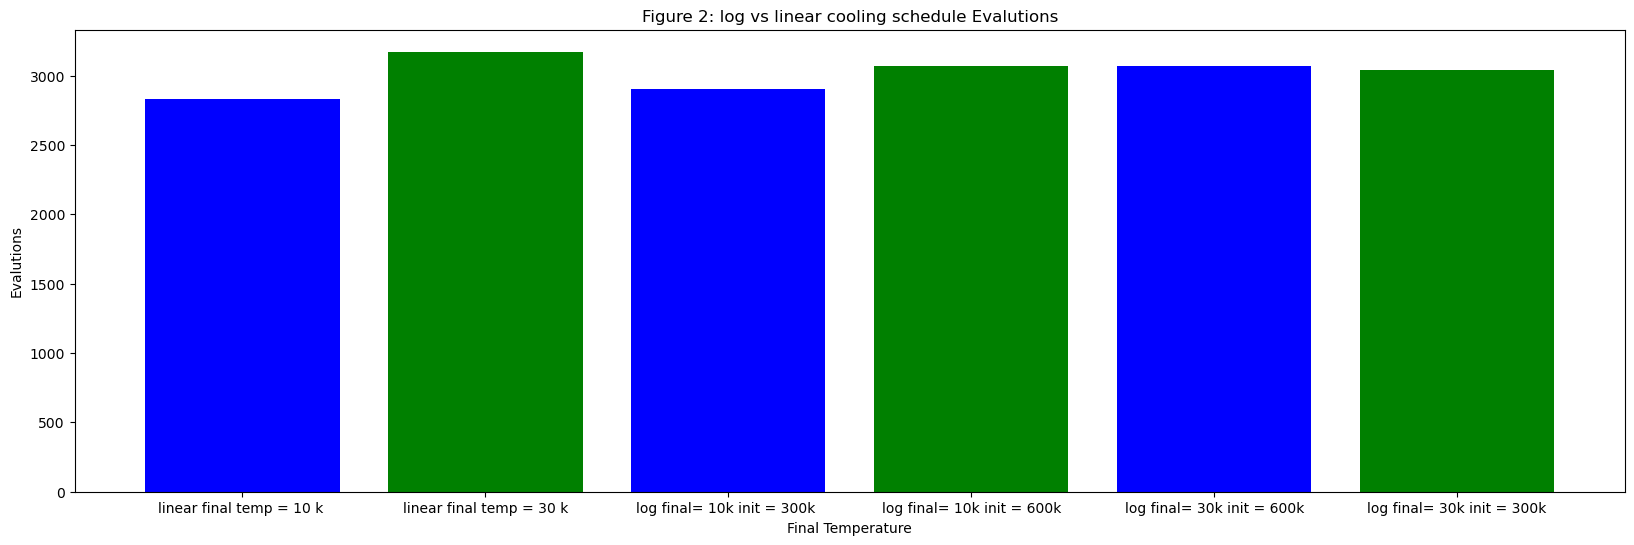

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
final_temps = ['linear final temp = 10 k ', 'linear final temp = 30 k', 'log final= 10k init = 300k ','log final= 10k init = 600k', 
               'log final= 30k init = 600k', 'log final= 30k init = 300k'
              ]
mean_values = [averge_trials, averge,averge_trials2 ,averge_trials4 ,averge_trials3, averge_trials1]
 
# Create a bar graph
plt.bar(final_temps, mean_values, color=['blue', 'green'])

# Titles and labels
plt.title('Figure 2: log vs linear cooling schedule Evalutions')
plt.ylabel('Evalutions')
plt.xlabel('Final Temperature')

# Display the graph
plt.show()

##### Answer 1b:

In optimization algorithms, different cooling schedules in simulated annealing offer varied pathways for the algorithm to explore the solution space and potentially converge to an optimal solution. In the context of the Schwefel function and the given parameters, our observations yielded interesting insights.

Both the logarithmic and linear cooling schedules displayed similarities in their convergence patterns. This similarity is intriguing because one might anticipate distinct behaviors given the inherent differences in these schedules.

Referring to Figure 2, which showcases the algorithm's progress across different runs, we can discern specific trends. With a logarithmic cooling schedule, when the final temperature is set to 10K and the initial temperature is relatively high, say 6000K, the algorithm tends to converge to relatively lower than the other mean function evaluations. This behavior contrasts sharply with other runs, especially those with lower initial temperatures, where the function evaluations are markedly higher.


#### (c) (3pt) Create your own annealing schedule (cooling and heating cycles) to see if you can find better solutions. Use a local optimization technique on your CSA answer, can you find even better solution?

In [33]:
#function to calculate my own log paramters for a cooling schedule 
sigma_curr = 1000
k_max = 6000



In [34]:
# Custom annealing schedule
def custom_annealing_schedule(T_initial=10, T_peak=200, T_final=1, cycles=1000):
    temperatures = []
    
    # Initial heating phase (20% of steps)
    heating_initial = np.linspace(T_initial, T_peak, cycles//5)
    
    # Slow cooling phase (30% of steps)
    slow_cooling = np.linspace(T_peak, T_initial, 3*cycles//10)
    
    # Rapid heating phase (20% of steps)
    rapid_heating = np.linspace(T_initial, T_peak, cycles//5)
    
    # Another slow cooling phase to final temperature (30% of steps)
    final_cooling = np.linspace(T_peak, T_final, 3*cycles//10)
    
    # Combine the phases
    temperatures.extend(heating_initial.tolist())
    temperatures.extend(slow_cooling.tolist())
    temperatures.extend(rapid_heating.tolist())
    temperatures.extend(final_cooling.tolist())

    return temperatures

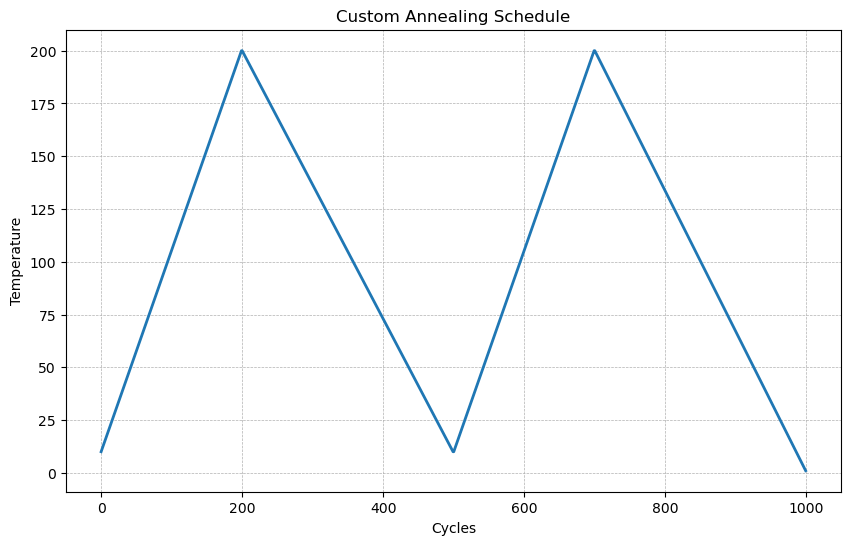

In [35]:
import matplotlib.pyplot as plt

# Generate the temperature values
temperatures = custom_annealing_schedule()

# Plot the temperature values
plt.figure(figsize=(10, 6))
plt.plot(temperatures, linewidth=2)
plt.title('Custom Annealing Schedule')
plt.xlabel('Cycles')
plt.ylabel('Temperature')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [36]:
#parameters for custom annealing schedule 
T_initial = 1000
T_peak =50 
cycles =20 
steps_per_cycle = 50
cooling_schedule = custom_annealing_schedule(T_initial, T_peak, cycles, steps_per_cycle)

# General parameters to solve for the Stimulating Annealing 
solution = np.random.uniform(-500, 500, 10)
evaluation = schwefel_function
delta = 0.5 
boundary = [-500 , 500]


In [37]:
# Trial 1 
from scipy.optimize import minimize


# Parameters for Custom Simulated Annealing
solution = np.random.uniform(-500, 500, 10)
delta = 0.5
boundary = [-500, 500]
cooling_schedule = custom_annealing_schedule(T_initial=10, T_peak=100, T_final=5, cycles=1000)

# Applying Custom Simulated Annealing
sa_custom1 = SA(solution, schwefel_function, delta, boundary, cooling_schedule)
print(sa_custom1)

# Using scipy's minimize with the Conjugate Gradient method on the CSA answer
initial_solution = sa_custom1["solution"]
cg1 = minimize(schwefel_function, initial_solution, method='CG')
print("\nPost-CSA CG Solution (x value):", cg1.x)
print("Post-CSA CG Function value at solution:", cg1.fun)


0/1000   temp:10.000000
500/1000   temp:10.000000
{'solution': array([-173.89047478, -328.03321401,  476.75232542,  406.34715702,
       -238.29049695,  479.70443832,  132.95631336,  396.8767157 ,
        422.92407959,  394.80273772]), 'evaluation': 2635.5993993775483}

Post-CSA CG Solution (x value): [-124.82936143 -302.52491581  420.96872917  420.96876879 -302.52495488
  420.96868088  203.81423942  420.9687761   420.96874259  420.96874655]
Post-CSA CG Function value at solution: 750.1231796545062


In [38]:
# Trial 2
from scipy.optimize import minimize


# Parameters for Custom Simulated Annealing
solution = np.random.uniform(-500, 500, 10)
delta = 0.5
boundary = [-500, 500]
cooling_schedule = custom_annealing_schedule(T_initial=10, T_peak=100, T_final=5, cycles=1000)

# Applying Custom Simulated Annealing
sa_custom2 = SA(solution, schwefel_function, delta, boundary, cooling_schedule)
print(sa_custom2)

# Using scipy's minimize with the Conjugate Gradient method on the CSA answer
initial_solution = sa_custom2["solution"]
cg2 = minimize(schwefel_function, initial_solution, method='CG')
print("\nPost-CSA CG Solution (x value):", cg2.x)
print("Post-CSA CG Function value at solution:", cg2.fun)


0/1000   temp:10.000000
500/1000   temp:10.000000
{'solution': array([-311.4957316 ,  212.04723745,  268.38383534,  359.69507492,
       -368.19789677, -259.19376836,  297.49131029,   79.37967968,
        -15.2679968 , -134.47536809]), 'evaluation': 3992.4294308881954}

Post-CSA CG Solution (x value): [-302.52495772  203.81421267  203.81423255  420.96878303 -302.52495515
 -302.52499147  203.81426914   65.54789174  -25.87740866 -124.8293454 ]
Post-CSA CG Function value at solution: 2053.0886854205432


In [39]:
# Trial 3
from scipy.optimize import minimize


# Parameters for Custom Simulated Annealing
solution = np.random.uniform(-500, 500, 10)
delta = 0.5
boundary = [-500, 500]
cooling_schedule = custom_annealing_schedule(T_initial=10, T_peak=100, T_final=5, cycles=1000)

# Applying Custom Simulated Annealing
sa_custom3 = SA(solution, schwefel_function, delta, boundary, cooling_schedule)
print(sa_custom3)

# Using scipy's minimize with the Conjugate Gradient method on the CSA answer
initial_solution = sa_custom3["solution"]
cg3 = minimize(schwefel_function, initial_solution, method='CG')
print("\nPost-CSA CG Solution (x value):", cg3.x)
print("Post-CSA CG Function value at solution:", cg3.fun)


0/1000   temp:10.000000
500/1000   temp:10.000000
{'solution': array([ -38.02770855,  188.78716439, -125.75788828,    1.09055957,
        251.81797634,  356.37183228, -361.13847225,  447.27405374,
       -438.52502849, -494.03814758]), 'evaluation': 3904.5387874144917}

Post-CSA CG Solution (x value): [ -25.87740942  203.81422561 -124.82946132    5.23905949  203.81428381
  420.96877333 -302.52516866  420.96893647 -559.14863303 -559.14847768]
Post-CSA CG Function value at solution: 1382.4092072731528


In [40]:
#Mean lowest evalution of the three trials at final temp 30k and init at 600k
averge_trialsCG = np.mean([cg1.fun, cg2.fun, cg3.fun])
averge_trialsCG


1395.2070241160673

In [41]:
#Mean lowest evalution of the three trials for custom SA 
averge_trialsa= np.mean([sa_custom1["evaluation"], sa_custom2["evaluation"], sa_custom3["evaluation"]])
averge_trialsa



3510.8558725600783

##### Answer 1c:


2.  (11 pt) Clustering and simulated annealing. Clustering is a widely used technique in exploratory data analysis that we will examine later using unsupervised learning for classification of objects into groups. But for now we will consider a popular meta-heuristic for solving it using CSA. In this case we would like to cluster N data points into K clusters by solving the minimization of the following cost function:


𝐽(𝑁,𝐾) = $\overset{N}{\underset{i=1}{\sum}}$ $\overset{k}{\underset{j=1}{\sum}}$  ${w_{ij}}{d^2_{i_j}}$ 



𝑤𝑖𝑗 = = $\{^{1}_{0}$ 𝑖𝑓 𝑝𝑜𝑖𝑛𝑡 𝑖 𝑖𝑠 𝑎𝑠𝑠𝑖𝑔𝑛𝑒𝑑 𝑡𝑜 𝑐𝑙𝑢𝑠𝑡𝑒𝑟 𝑗
                                         𝑜𝑡ℎ𝑒𝑟𝑤𝑖𝑠𝑒,  1 ≤ 𝑖 ≤ 𝑁 𝑎𝑛𝑑 1 ≤ 𝑗 ≤ k

where ${d{i_j}}$  is the Euclidean distance between point 𝑖 and the center of cluster 𝑗, and condition on 𝑤𝑖𝑗 ensures
that a point is defined to be in one of the distinct clusters 𝐾.
In this problem you are given a data set of 𝑁 =178 wines, all
grown in the same region in Italy, but derived from 𝐾=3 different
cultivars. You can find this dataset on BCourse -> Files -> Datasets ->
wines.csv. A chemical analysis was used to determine the quantities of
13 chemical constituents found in each of the wines, and our job is to
classify each wine into one of the three different cultivars based on those
chemical descriptors. Use CSA to determine the most optimal clustering
of the 178 wines into their most likely cultivar, given the following specifications                                       

#### (a) (1pt) Normalize your chemical descriptor data for each attribute by subtracting off the mean and dividing by the standard deviation.

In [42]:
import pandas as pd
#import the wines csv into a dataframe(df)
wines = pd.read_csv('wines.csv')
wines

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
2,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1,1
3,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,1,1
4,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,3,3
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,3
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,3
176,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,3,3


In [43]:
#to visualize the df 
wines.describe()

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,2.016854,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.819775,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000,3.000000


In [44]:
#normalize the chemical descriptor 
wines_adjusted = (wines - wines.mean()) / wines.std()
wines_adjusted

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,-1.240406,-1.210529
1,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,-1.240406,-1.210529
2,2.253415,-0.623328,-0.716315,-1.645408,-0.191954,0.806722,0.951817,-0.577356,0.679820,0.061213,0.536158,0.335659,0.946649,-1.240406,-1.210529
3,1.378844,-0.766550,-0.169557,-0.806975,-0.331985,-0.151973,0.401188,-0.818411,-0.036514,-0.025057,0.929908,0.293405,1.692900,-1.240406,-1.210529
4,0.923081,-0.542765,0.158499,-1.046527,-0.752080,0.487157,0.731565,-0.577356,0.382804,0.233755,0.842408,0.406082,1.819921,-1.240406,-1.210529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.491955,2.026281,1.798775,1.648436,0.858284,-0.503494,-1.070491,-0.738059,-0.840205,1.484679,-1.257591,-0.974218,-0.371199,1.199288,1.370000
174,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786,1.199288,1.370000
175,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664,1.199288,1.370000
176,1.391162,1.578712,1.361368,1.498716,-0.261969,-0.391646,-1.270720,1.592131,-0.420888,1.786626,-1.520090,-1.424928,-0.593486,1.199288,1.370000


#### (b) (1pt) Give the initial categorization of the 178 wines into the 3 clusters according to Start assignment column in the dataset, determine the centroid of each of the three clusters. The centroid for this problem is a 13-D vector where each entry is the mean of a variable for the observations in that cluster.

In [45]:
#reset assignments
wines_adjusted['Start assignment'] = wines['Start assignment']


In [46]:
#find the unique clusters in the start assignment column 
clusters = wines_adjusted['Start assignment'].unique()
clusters

array([1, 2, 3])

In [47]:
#divide the wines_adjusted df by all different clusters 
cluster1_data = wines_adjusted[wines_adjusted['Start assignment'] == clusters[0]]
cluster1_data



,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,1,-1.210529
1,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,1,-1.210529
2,2.253415,-0.623328,-0.716315,-1.645408,-0.191954,0.806722,0.951817,-0.577356,0.679820,0.061213,0.536158,0.335659,0.946649,1,-1.210529
3,1.378844,-0.766550,-0.169557,-0.806975,-0.331985,-0.151973,0.401188,-0.818411,-0.036514,-0.025057,0.929908,0.293405,1.692900,1,-1.210529
4,0.923081,-0.542765,0.158499,-1.046527,-0.752080,0.487157,0.731565,-0.577356,0.382804,0.233755,0.842408,0.406082,1.819921,1,-1.210529
5,1.600566,-0.372689,1.288467,0.151234,1.418411,0.806722,1.111999,-0.255951,0.662349,0.492567,0.492408,0.053965,1.692900,1,-1.210529
6,1.304936,-0.632279,-0.315359,-1.046527,1.838506,1.126287,1.142034,-0.979113,0.889479,0.255322,0.579908,1.546943,0.105132,1,-1.210529
7,-0.185530,-0.659133,0.559455,-0.507534,-0.331985,0.295418,0.341120,-0.818411,-0.228701,-0.486605,0.579908,1.434265,0.851383,1,-1.210529
8,0.615134,-0.471154,0.887510,0.151234,-0.261969,0.375309,0.581394,-0.657708,0.120730,-0.663460,0.711158,1.701875,0.311541,1,-1.210529
9,0.368776,-0.551717,-0.825667,-0.747087,-0.402001,0.167592,0.160914,-0.738059,-0.420888,-0.477978,0.273659,0.222981,1.708777,1,-1.210529


In [48]:
#centriod for cluster 1 data 
centroid1_data = cluster1_data.drop(columns=['Start assignment', 'ranking']).mean()
centroid1_data


Alcohol %          -0.026247
Malic Acid         -0.022814
Ash                 0.039092
Alkalinity         -0.011393
Mg                  0.001194
Phenols             0.046102
Flavanoids         -0.014459
Phenols.1          -0.092477
Proantho-cyanins    0.015299
Color intensity    -0.122335
Hue                 0.071956
OD280 315          -0.021072
Proline            -0.001085
dtype: float64

In [49]:
#values for 13D centroid 1 
cluster1centri = centroid1_data.values
cluster1centri

array([-0.02624653, -0.02281371,  0.03909152, -0.01139289,  0.00119361,
        0.04610228, -0.01445858, -0.09247727,  0.01529861, -0.12233484,
        0.07195608, -0.02107247, -0.00108455])

In [50]:
#divide the wines_adjusted df by all different clusters 
cluster2_data = wines_adjusted[wines_adjusted['Start assignment'] == clusters[1]]
cluster2_data

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
58,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,2,-1.210529
59,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,2,-1.210529
60,1.477387,-0.515911,0.304301,-1.286079,0.858284,1.557699,1.362285,-0.175599,0.662349,0.729811,0.404908,0.335659,2.232741,2,-1.210529
61,1.058578,-0.882918,-0.351810,-1.046527,-0.121938,1.094330,1.122011,-1.139816,0.452690,0.932547,0.229909,1.321588,0.946649,2,-1.210529
62,2.154872,-0.542765,0.085597,-2.423952,-0.612049,1.286069,1.662628,0.547563,2.129959,0.147484,1.279908,0.166643,1.280080,2,-1.210529
63,1.021625,-0.685988,0.923961,0.151234,1.068331,1.046395,1.372297,0.306509,0.225560,0.665108,0.754908,-0.058713,1.216569,2,-1.210529
64,-0.086987,1.310170,1.033313,-0.267982,0.158126,0.183570,0.381165,-0.898762,0.679820,-0.240734,0.317409,1.279334,0.073376,2,-1.210529
65,0.060828,-0.256321,3.110996,1.648436,1.698474,0.535092,0.651474,0.868969,0.574991,-0.637579,0.754908,0.828623,0.263908,2,-1.210529
66,1.070896,-0.390592,1.580071,-0.028430,0.508205,1.046395,0.941805,0.065455,0.295446,-0.240734,1.279908,1.110317,0.533829,2,-1.210529
67,0.898446,-0.748647,1.215566,0.899835,0.088110,1.126287,1.222125,-0.577356,1.378682,0.276890,1.017408,0.138473,1.708777,2,-1.210529


In [51]:
#centriod for cluster 1 data 
centroid2_data = cluster2_data.drop(columns=['Start assignment', 'ranking']).mean()
centroid2_data

Alcohol %          -0.030199
Malic Acid         -0.043157
Ash                -0.117661
Alkalinity         -0.122322
Mg                 -0.180086
Phenols            -0.109996
Flavanoids         -0.040333
Phenols.1           0.035493
Proantho-cyanins   -0.146673
Color intensity    -0.217850
Hue                 0.084570
OD280 315           0.077599
Proline            -0.085239
dtype: float64

In [52]:
#values for 13D centroid 1 
cluster2centri = centroid2_data.values
cluster2centri

array([-0.03019892, -0.04315704, -0.11766091, -0.12232231, -0.18008643,
       -0.1099961 , -0.04033264,  0.03549325, -0.14667323, -0.2178502 ,
        0.08456967,  0.07759861, -0.08523904])

In [53]:
#divide the wines_adjusted df by all different clusters 
cluster3_data = wines_adjusted[wines_adjusted['Start assignment'] == clusters[2]]
cluster3_data

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
117,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,3,-1.210529
118,1.711427,-0.417446,0.304301,-1.465743,-0.261969,0.327374,0.491291,-0.497005,0.679820,0.082781,0.273659,1.363842,1.724655,3,-1.210529
119,1.304936,-0.166807,0.887510,-0.567423,1.488427,0.487157,0.481280,-0.416654,-0.595603,-0.003490,0.448658,1.363842,1.740533,3,-1.210529
120,1.354208,-0.157856,-0.242458,-0.447646,0.368173,1.046395,1.292205,-1.139816,1.378682,0.298458,1.279908,0.786369,2.423273,3,-1.210529
121,1.699109,-0.417446,0.049147,-2.244288,0.158126,1.605634,1.612571,-0.577356,2.392033,1.053326,1.061158,0.546929,2.540768,3,-1.210529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.491955,2.026281,1.798775,1.648436,0.858284,-0.503494,-1.070491,-0.738059,-0.840205,1.484679,-1.257591,-0.974218,-0.371199,3,1.370000
174,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786,3,1.370000
175,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664,3,1.370000
176,1.391162,1.578712,1.361368,1.498716,-0.261969,-0.391646,-1.270720,1.592131,-0.420888,1.786626,-1.520090,-1.424928,-0.593486,3,1.370000


In [54]:
#centriod for cluster 3 data 
centroid3_data = cluster3_data.drop(columns=['Start assignment', 'ranking']).mean()

centroid3_data


Alcohol %           0.054165
Malic Acid          0.063434
Ash                 0.076634
Alkalinity          0.129144
Mg                  0.173047
Phenols             0.062555
Flavanoids          0.052758
Phenols.1           0.053600
Proantho-cyanins    0.127318
Color intensity     0.327026
Hue                -0.150214
OD280 315          -0.055018
Proline             0.083476
dtype: float64

In [55]:
#values for 13D centroid 3
cluster3centri = centroid3_data.values
cluster3centri


array([ 0.05416451,  0.06343378,  0.07663419,  0.12914432,  0.17304706,
        0.06255472,  0.05275776,  0.05359967,  0.12731805,  0.32702594,
       -0.15021415, -0.05501827,  0.08347553])

#### (c) (1pt) Given the centroid, determine the value of the cost function for this initial categorization. Check against the debugging output.

In [56]:

# Define the squared Euclidean distance function
def squared_euclidean_distance(point, centroid):
    """
    Compute the squared Euclidean distance between a given point and centroid.
    This function computes the squared difference for each dimension, and then 
    sums them up to get the total squared distance.
    """
    return np.sum((point - centroid)**2)

# Dictionary for centroids:
# Store the centroids for each cluster label (1, 2, and 3).
# The cluster label acts as the key while the centroid coordinates are the value.
centroids = {
    1: cluster1centri,
    2: cluster2centri,
    3: cluster3centri
}


def cost_function(feats, assignments):
    """
    Calculate the cost function for given assignments to data points.
    The cost is the sum of squared distances from each point to its assigned centroid.
    """
    # Extract data points
    data_points = feats.drop(['Start assignment', 'ranking'], axis=1).values
    
    # Compute the squared distances for each point to each centroid
    distances = np.array([[squared_euclidean_distance(point, centroids[centroid_label]) for centroid_label in centroids.keys()] for point in data_points])
    
    # Create a boolean matrix where each row indicates the assigned centroid
    assignment_matrix = np.equal(assignments[:, None], np.array([1, 2, 3]))

    # Use the boolean matrix to select the correct distance value for each data point
    total_cost = np.sum(assignment_matrix * distances)
    
    return total_cost

assignments = wines_adjusted['Start assignment'].values
feats = wines_adjusted



In [57]:
cost_val = cost_function(wines_adjusted, assignments)

print(f"Cost function value : {cost_val}")


Cost function value : 2275.34927819508


#### (d) (4pt) Fill in the blanks in the provided simulated annealing code. Use CSA with a visitation function in which a randomly chosen wine 𝑖 is moved from its present cluster 𝑗 to another randomly chosen cluster 𝑘 ≠ 𝑗. One epoch corresponds to attempting to move all 𝑁 wines between clusters, i.e. there are 𝑁 Metropolis steps, at each temperature. Use a start temperature of 500, and use a geometric cooling schedule(Tt+1=αTt) with α=0.999 and total of 5000 steps, again using at least 3 runs of CSA. Check your final temperature against debugging output. Report all 3 solutions and the wine members as part of each cluster. Validate your result using the provided code. How well is the assignment?

In [58]:
def visitation(ranks):
    """Pick a wine randomly and attempt to move it to another cluster."""
    # Copy ranks
    trial = ranks.copy()
    # Select a random wine
    wine_idx = np.random.randint(len(ranks)) 
    current_cluster = trial[wine_idx]
    # Randomly select a new cluster different from the current one
    new_cluster = current_cluster
    while new_cluster == current_cluster:
        new_cluster = np.random.randint(1, 4)  # Random integer between 1 and 3 (inclusive)
    trial[wine_idx] = new_cluster
    return trial


def simulated_annealing(feats, ranks, centers, start_temp, alpha, steps=10000):
    """Simulated Annealing for clustering."""
    temp = start_temp  # Initializing temperature
    best_rank = ranks.copy()
    # evaluate the cost function with the current best rank
    lowest_eval = cost_function(feats, best_rank)

    for step in range(steps):
        # update temperature according to the geometric cooling schedule
        temp *= alpha
        if step % 500 == 0:
            print(step, temp, lowest_eval)
        
        # For each epoch, attempt to move all wines between clusters
        for _ in range(len(ranks)):
            trial = visitation(ranks)
            # Metropolis acceptance criterion
            delta = cost_function(feats, trial) - lowest_eval
            if delta < 0 or np.exp(-delta / temp) > np.random.random():
                ranks = trial
                current_eval = cost_function(feats, ranks)
                
                if current_eval < lowest_eval:
                    best_rank = ranks.copy()
                    lowest_eval = current_eval
                    
    return {"solution": best_rank, "evaluation": lowest_eval, "Temperature" : temp}

# Assuming wines_adjusted, cluster1centri, cluster2centri, cluster3centri exist #run 1
feats = wines_adjusted
start_temp = 500
alpha = 0.999
ranks = wines_adjusted['Start assignment'].values
centers = np.array([cluster1centri, cluster2centri, cluster3centri])

CSA_cluster1 = simulated_annealing(feats, ranks, centers, start_temp, alpha, steps=5000)

print(CSA_cluster1)

0 499.5 2275.34927819508
500 302.8862829581618 2274.698584640981
1000 183.6638646730965 2274.698584640981
1500 111.36990046959976 2274.0785065210075
2000 67.53236273605106 2274.0785065210075
2500 40.95020285986944 2271.731659528405
3000 24.831340802019085 2271.731659528405
3500 15.057202235016815 2265.2177707493956
4000 9.130370403830968 2256.4581524658533
4500 5.536464371666806 2256.4581524658533
{'solution': array([3, 2, 2, 1, 3, 3, 2, 1, 2, 1, 1, 1, 3, 1, 1, 2, 3, 1, 3, 1, 3, 2,
       2, 1, 2, 2, 1, 2, 3, 2, 1, 3, 1, 2, 1, 3, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       1, 3, 2, 3, 1, 1, 1, 3, 3, 1, 1, 3, 2, 1, 2, 3, 1, 2, 2, 1, 2, 1,
       1, 3, 2, 1, 3, 2, 3, 3, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3,
       1, 3, 2, 1, 2, 2, 1, 3, 1, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3,
       1, 3, 3, 1, 2, 3, 2, 1, 1, 2, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       3, 3, 2, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3,
  

In [59]:
# Assuming wines_adjusted, cluster1centri, cluster2centri, cluster3centri exist #run 2
feats = wines_adjusted
start_temp = 500
alpha = 0.999
ranks = wines_adjusted['Start assignment'].values
centers = np.array([cluster1centri, cluster2centri, cluster3centri])

CSA_cluster2 = simulated_annealing(feats, ranks, centers, start_temp, alpha, steps=5000)

print(CSA_cluster2)

0 499.5 2275.34927819508
500 302.8862829581618 2272.026248233268
1000 183.6638646730965 2272.026248233268
1500 111.36990046959976 2272.026248233268
2000 67.53236273605106 2269.546086510507
2500 40.95020285986944 2269.546086510507
3000 24.831340802019085 2269.546086510507
3500 15.057202235016815 2259.696630235998
4000 9.130370403830968 2259.696630235998
4500 5.536464371666806 2259.696630235998
{'solution': array([2, 1, 2, 1, 2, 3, 1, 2, 2, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 3, 1, 1,
       1, 1, 1, 2, 3, 2, 3, 1, 2, 2, 2, 1, 3, 3, 1, 2, 2, 3, 3, 2, 2, 3,
       1, 3, 3, 1, 2, 3, 3, 2, 3, 3, 2, 3, 1, 1, 1, 1, 3, 2, 3, 1, 1, 3,
       1, 1, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 1, 2, 1, 2, 3, 1, 3, 3, 2, 3,
       1, 2, 2, 3, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 3, 3, 3, 1, 3, 3, 2, 3,
       1, 3, 2, 1, 2, 2, 3, 1, 2, 1, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 1, 1,
       2, 3, 1, 3, 1, 2, 1, 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       3, 1, 3, 2, 1, 3, 3, 2, 1, 3, 1, 3, 3, 2, 3, 3, 1, 1, 3, 3, 3, 3,
       

In [60]:
# Assuming wines_adjusted, cluster1centri, cluster2centri, cluster3centri exist #run 3
feats = wines_adjusted
start_temp = 500
alpha = 0.999
ranks = wines_adjusted['Start assignment'].values
centers = np.array([cluster1centri, cluster2centri, cluster3centri])

CSA_cluster3 = simulated_annealing(feats, ranks, centers, start_temp, alpha, steps=5000)

print(CSA_cluster3)

0 499.5 2275.34927819508
500 302.8862829581618 2265.6362679785134
1000 183.6638646730965 2265.6362679785134
1500 111.36990046959976 2265.6362679785134
2000 67.53236273605106 2265.6362679785134
2500 40.95020285986944 2265.6362679785134
3000 24.831340802019085 2261.92907053859
3500 15.057202235016815 2261.92907053859
4000 9.130370403830968 2258.9082246206667
4500 5.536464371666806 2250.6667893742033
{'solution': array([3, 3, 3, 1, 1, 2, 3, 1, 2, 1, 3, 1, 2, 1, 1, 3, 1, 3, 3, 3, 2, 3,
       2, 1, 2, 2, 2, 1, 1, 2, 3, 2, 1, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 3,
       2, 2, 3, 1, 2, 2, 1, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 1, 2, 3, 3, 3,
       3, 3, 2, 1, 1, 3, 3, 3, 2, 3, 3, 1, 2, 1, 1, 3, 1, 3, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 1, 1, 1, 2, 1, 3, 3, 2, 2, 2, 3,
       3, 2, 2, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 1, 1, 3, 2, 3, 1, 2,
       3, 1, 2, 1, 1, 1, 3, 2, 3, 2, 1, 2, 3, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       3, 3, 1, 2, 1, 2, 2, 3, 2, 3, 1, 2, 3, 3, 3, 3, 2, 3, 2, 2, 1, 3,
  

In [61]:
#mean lowest evalution of the three trials 
averge_trials_sa = np.mean([CSA_cluster1["evaluation"], CSA_cluster2["evaluation"], CSA_cluster3["evaluation"]])
averge_trials_sa


2248.7737044044757

In [62]:
def validate(solution, df): #modified validate because the index goes out of range 
    """Prints out how many wines are correctly assigned to its cultivar
    solution: np.array shape(178,). Your solution.
    df: pd.DataFrame. Read-in of the wines.csv dataset
    """
    # correct classification
    ranking = df['Start assignment'].values
    cluster_1 = list(df[df['Start assignment'] == 1].index)
    cluster_2 = list(df[df['Start assignment'] == 2].index)
    cluster_3 = list(df[df['Start assignment'] == 3].index)
    clusters = [cluster_1, cluster_2, cluster_3]

    for i in range(1, 4):  # loop over solutions
        counts = []
        scores = []
        for j in range(3):  # loop over clusters of true assignments
            sol_i = [idx for idx, k in enumerate(solution) if k == i]
            counts.append(len(np.intersect1d(sol_i, clusters[j])))
            if len(clusters[j]) != 0:  # Ensure there's no division by zero
                scores.append(counts[-1] / len(clusters[j]))
            else:
                scores.append(0)
        idx = np.argmax(scores)
        print(f'Class {i} - cultivar {idx + 1}: {counts[idx]} out of {len(clusters[idx])} are classified correctly')


In [63]:
#validate run 1 for 2e
solution1 = CSA_cluster1["solution"]
df = wines_adjusted 
soultion_val1 = validate(solution, df)

Class 1 - cultivar 1: 0 out of 58 are classified correctly
Class 2 - cultivar 1: 0 out of 58 are classified correctly
Class 3 - cultivar 1: 0 out of 58 are classified correctly


In [64]:
#validate run 1 for 2e
solution2 = CSA_cluster2["solution"]
df = wines_adjusted 
soultion_val1 = validate(solution, df)

Class 1 - cultivar 1: 0 out of 58 are classified correctly
Class 2 - cultivar 1: 0 out of 58 are classified correctly
Class 3 - cultivar 1: 0 out of 58 are classified correctly


In [65]:
#validate run 1 for 2e
solution3 = CSA_cluster3["solution"]
df = wines_adjusted 
soultion_val3= validate(solution, df)

Class 1 - cultivar 1: 0 out of 58 are classified correctly
Class 2 - cultivar 1: 0 out of 58 are classified correctly
Class 3 - cultivar 1: 0 out of 58 are classified correctly


#### (e) (4pt) Adapt your code in 2(d). Now use CSA with a visitation function in which a randomly chosen centroid 𝑗 is updated as a random walk for each of its 13 components 𝑥𝑖 = 𝑥𝑖 + (2 ∗ 𝑈𝑅𝑁 − 1) × ∆; with ∆=0.01 In this case one epoch corresponds to moving all 𝐾 = 3 cluster centers at each temperature, reassigning all wines to their nearest centroid, and evaluating the new cost function. Check against the debugging output to make sure you are assigning wines correctly. Use a start temperature of 500, and use a geometric cooling schedule with α=0.999 and total of 5000 steps, again using at least 3 runs of CSA. Report all 3 solutions and the wine members as part of each cluster. Is this a better solution than found in (d)?

In [66]:
# Update the cost_function to accept centroids directly
def cost_function(feats, assignments, centroids):
    data_points = feats.drop(['Start assignment', 'ranking'], axis=1).values
    distances = np.array([[squared_euclidean_distance(point, centroids[centroid_label]) for centroid_label in centroids.keys()] for point in data_points])
    assignment_matrix = np.equal(assignments[:, None], np.array([1, 2, 3]))
    total_cost = np.sum(assignment_matrix * distances)
    return total_cost


def visitation_centroid(centroids, delta=0.01):
    """Pick a centroid randomly and perturb its components using a random walk."""
    centroid_idx = np.random.randint(len(centroids))  # Randomly select a centroid
    for i in range(len(centroids[centroid_idx])):
        centroids[centroid_idx][i] += (2 * np.random.random() - 1) * delta
    return centroids

def nearest_centroid(wine, centroids):
    """Find the nearest centroid for a given wine."""
    distances = [np.linalg.norm(wine - centroid) for centroid in centroids]
    return np.argmin(distances) + 1

def reassign_wines_to_centroids(feats, centroids):
    """Reassign each wine to the nearest centroid."""
    wines = feats.drop(['Start assignment', 'ranking'], axis=1).values
    return np.array([nearest_centroid(wine, centroids) for wine in wines])
    
def simulated_annealing(feats, ranks, centers, start_temp, alpha, steps=10000, delta=0.01):
    centroids_dict = {
        1: centers[0],
        2: centers[1],
        3: centers[2]
    }
    temp = start_temp  # Initializing temperature
    best_rank = ranks.copy()
    # evaluate the cost function with the current best rank
    lowest_eval = cost_function(feats, best_rank, centroids_dict)

    for step in range(steps):
        # update temperature according to the geometric cooling schedule
        temp *= alpha
        if step % 500 == 0:
            print(step, temp, lowest_eval)
        
        # Epoch: move ALL centroids, reassign wines, evaluate cost
        for _ in range(len(centers)):
            centers = visitation_centroid(centers, delta)
        ranks = reassign_wines_to_centroids(feats, centers)
        centroids_dict = {
            1: centers[0],
            2: centers[1],
            3: centers[2]
        }

        current_eval = cost_function(feats, ranks, centroids_dict)
        delta_eval = current_eval - lowest_eval
        if delta_eval < 0 or np.exp(-delta_eval / temp) > np.random.random():
            best_rank = ranks.copy()
            lowest_eval = current_eval

    return {"solution": best_rank, "evaluation": lowest_eval, "Temperature": temp}



In [67]:
# run 1 of SA for 2e
ranks = wines_adjusted['Start assignment'].values
centers = np.array([cluster1centri, cluster2centri, cluster3centri])
SA_run1 = simulated_annealing(feats, ranks, centers, start_temp=500, alpha=0.999, steps=5000, delta=0.01)
print(SA_run1)

0 499.5 2275.34927819508
500 302.8862829581618 2120.849470997173
1000 183.6638646730965 2155.0708097659513
1500 111.36990046959976 2145.3467095463275
2000 67.53236273605106 2149.9368884944315
2500 40.95020285986944 2208.2209333471574
3000 24.831340802019085 2212.845621798032
3500 15.057202235016815 2234.9934570324262
4000 9.130370403830968 2221.619510367931
4500 5.536464371666806 2246.368741740263
{'solution': array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 3,
       2, 1, 3, 1, 3, 1, 3, 2, 1, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1,
       1, 1, 2, 1, 1, 3, 3, 2, 2, 2, 1, 1, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2,
       1, 3, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 3, 2, 3, 2, 2, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 3, 1, 2, 3, 1, 3, 3, 3, 2, 1, 1, 3, 3, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2,
  

In [68]:
# run 2 of SA for 2e
ranks = wines_adjusted['Start assignment'].values
centers = np.array([cluster1centri, cluster2centri, cluster3centri])
SA_run2 = simulated_annealing(feats, ranks, centers, start_temp=500, alpha=0.999, steps=5000, delta=0.01)
print(SA_run2)

0 499.5 2275.34927819508
500 302.8862829581618 2157.0300922908195
1000 183.6638646730965 2111.4541945727024
1500 111.36990046959976 2159.6116785404856
2000 67.53236273605106 2174.2088677917886
2500 40.95020285986944 2114.0002306727974
3000 24.831340802019085 2122.384114423119
3500 15.057202235016815 2059.129113631518
4000 9.130370403830968 2078.32447987197
4500 5.536464371666806 2052.3404116883476
{'solution': array([2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 3, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
  

In [69]:
# run 3 of SA for 2e
ranks = wines_adjusted['Start assignment'].values
centers = np.array([cluster1centri, cluster2centri, cluster3centri])
start_temp=500
alpha=0.999
steps=5000
SA_run3 = simulated_annealing(feats, ranks, centers, start_temp=500, alpha=0.999, steps=5000, delta=0.01)
print(SA_run3)

0 499.5 2275.34927819508
500 302.8862829581618 2125.8910940107558
1000 183.6638646730965 2143.5198585395788
1500 111.36990046959976 2111.850800856717
2000 67.53236273605106 2160.829544075108
2500 40.95020285986944 2232.6604696180884
3000 24.831340802019085 2249.7910698053774
3500 15.057202235016815 2195.741138660981
4000 9.130370403830968 2190.8149518947057
4500 5.536464371666806 2166.7627629730828
{'solution': array([2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 3, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       3, 1, 1, 1, 3, 2, 1, 2, 2, 1, 2, 1, 3, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3,
 

In [70]:
#mean lowest evalution of the three trials 
averge_trials_sa2 = np.mean([SA_run1["evaluation"], SA_run2["evaluation"], SA_run3["evaluation"]])
averge_trials_sa2


2155.730291978199

In [71]:
def report_clusters(ranks):
    cluster_1 = np.where(ranks == 1)[0]
    cluster_2 = np.where(ranks == 2)[0]
    cluster_3 = np.where(ranks == 3)[0]

    print("\nCluster 1 Members:", cluster_1)
    print("Cluster 2 Members:", cluster_2)
    print("Cluster 3 Members:", cluster_3)



In [72]:
# Reporitng members of closers represent the index where the wines belong to
report_clusters(ranks)


Cluster 1 Members: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]
Cluster 2 Members: [ 58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116]
Cluster 3 Members: [117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177]


In [73]:
#validate run 1 for 2e
solution1 = SA_run1["solution"]
df = wines_adjusted 
soultion_val1 = validate(solution, df)

Class 1 - cultivar 1: 0 out of 58 are classified correctly
Class 2 - cultivar 1: 0 out of 58 are classified correctly
Class 3 - cultivar 1: 0 out of 58 are classified correctly


In [74]:
#validate run 2 for 2e
solution1 = SA_run2["solution"]
df = wines_adjusted 
soultion_val1 = validate(solution, df)

Class 1 - cultivar 1: 0 out of 58 are classified correctly
Class 2 - cultivar 1: 0 out of 58 are classified correctly
Class 3 - cultivar 1: 0 out of 58 are classified correctly


In [75]:
#validate run 3 for 2e
solution1 = SA_run3["solution"]
df = wines_adjusted 
soultion_val1 = validate(solution, df)

Class 1 - cultivar 1: 0 out of 58 are classified correctly
Class 2 - cultivar 1: 0 out of 58 are classified correctly
Class 3 - cultivar 1: 0 out of 58 are classified correctly
